In [210]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import naive_greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import louvain_partitions


In [3]:
G = nx.Graph()

In [12]:
G.add_nodes_from(["B","C","D","E"])
G.add_edges_from([("A","C"), ("B","D"), ("B","E"), ("C","E"), ("A","B")])
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

['B', 'C', 'D', 'E', 'A']
[('B', 'D'), ('B', 'E'), ('B', 'A'), ('C', 'A'), ('C', 'E')]


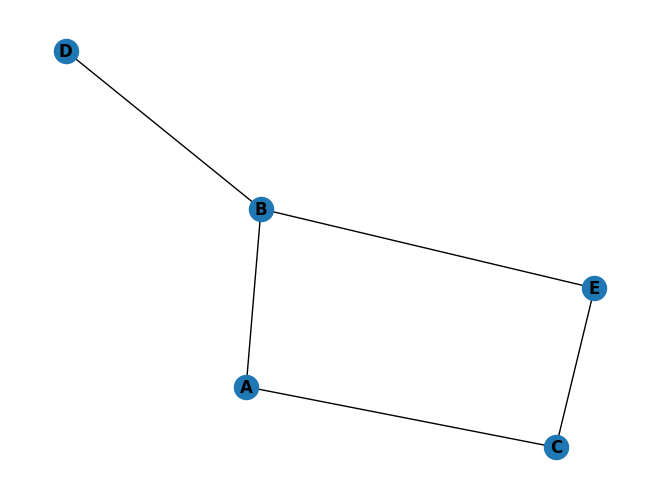

In [13]:
nx.draw(G, with_labels=True, font_weight="bold")
plt.show() 
#plt.savefig(“graph.png”) 

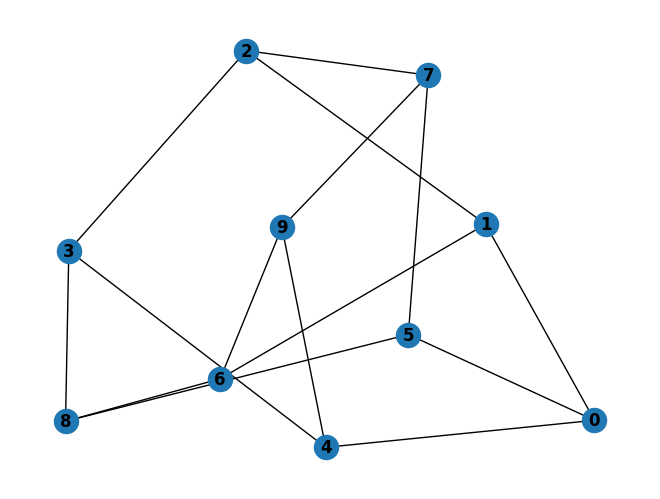

In [17]:
GP = nx.petersen_graph()
nx.draw(GP, with_labels=True, font_weight="bold")
plt.show()

In [20]:
print(G.adj)
print(G.degree("A")) #The degree of a vertex is defined by the number of edges incident to it. 

{'B': {'D': {}, 'E': {}, 'A': {}}, 'C': {'A': {}, 'E': {}}, 'D': {'B': {}}, 'E': {'B': {}, 'C': {}}, 'A': {'C': {}, 'B': {}}}
2


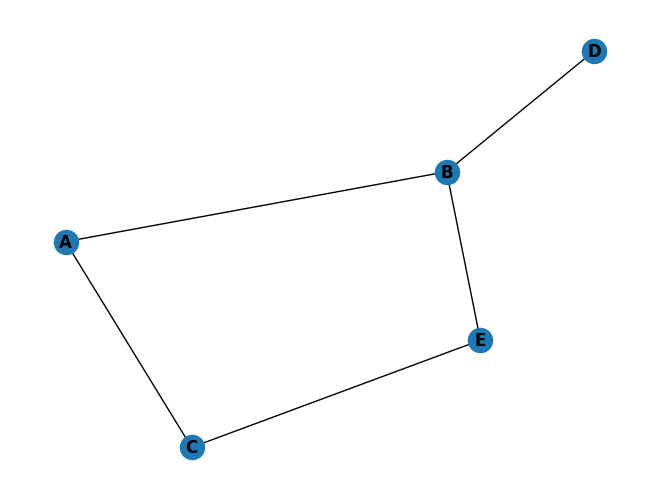

In [24]:
G = nx.Graph() 
E = [("A", "B", 2), ("A", "C", 1), ("B", "D", 5), ("B", "E", 3), ("C", "E", 2)]
G.add_weighted_edges_from(E)
nx.draw(G, with_labels=True, font_weight="bold")
plt.show()

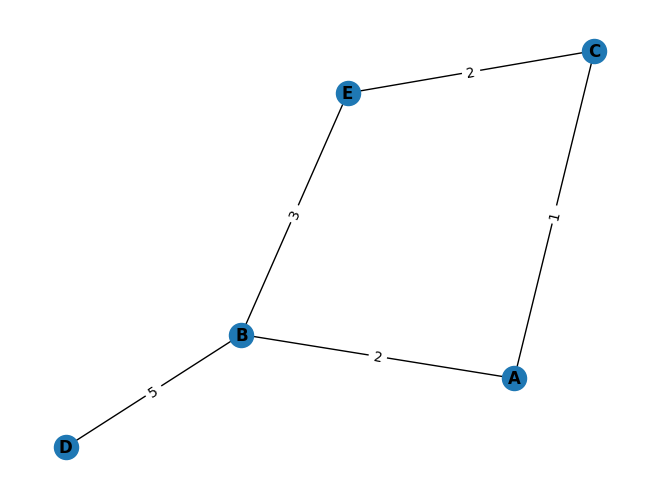

In [25]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight="bold")
edge_weight = nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

# communities

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


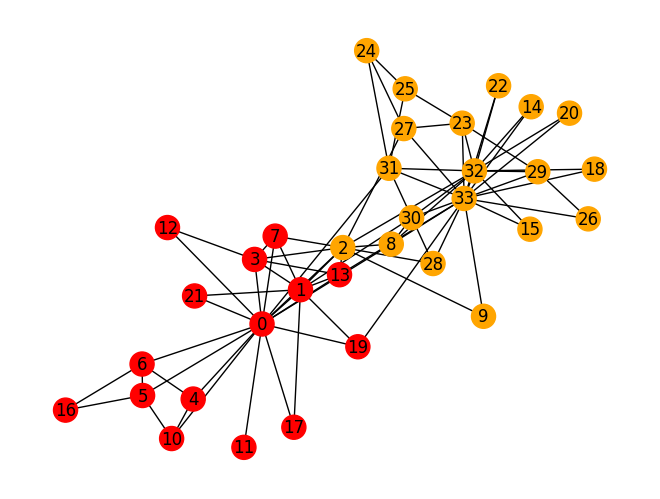

In [170]:
G = nx.karate_club_graph()
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})


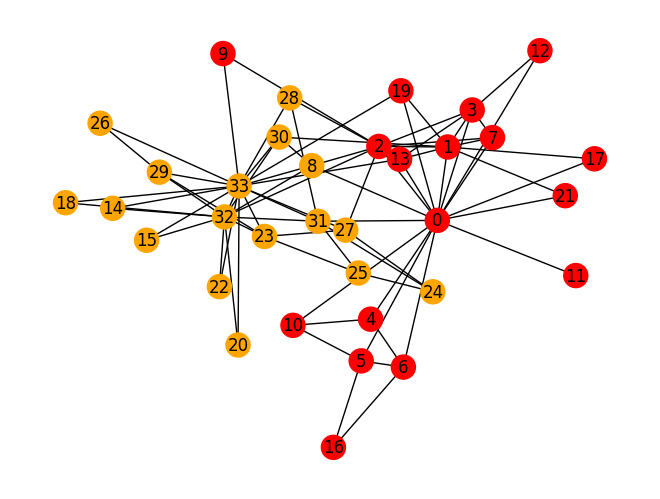

In [182]:
G = nx.karate_club_graph()
communities = kernighan_lin_bisection(G, partition=None, max_iter=10, weight='weight', seed=None)

print(communities)

color_map = []
for node in G:
    if node in communities[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


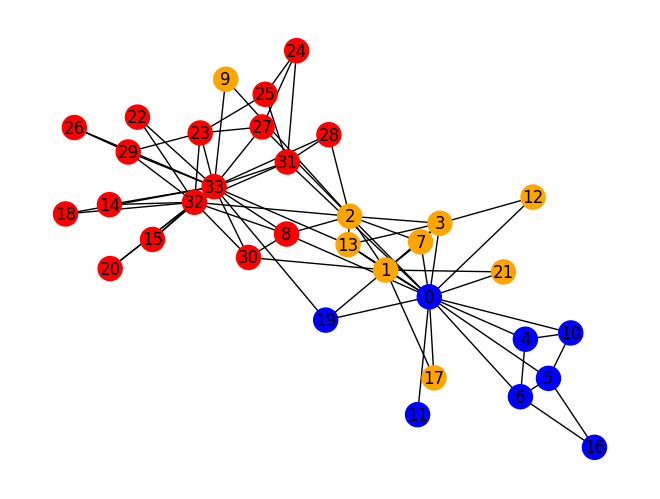

In [202]:
G = nx.karate_club_graph()
communities = greedy_modularity_communities(G)

print(communities)

colors = ["red", "orange", "blue", "black", "gold"]
color_map = []
for node in G:
    for j in range(len(list(communities))):
        if node in communities[j]:
            color_map.append(colors[j])
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

[frozenset({'Salviati', 'Medici', 'Acciaiuoli', 'Ridolfi', 'Tornabuoni', 'Pazzi'}), frozenset({'Castellani', 'Peruzzi', 'Bischeri', 'Barbadori', 'Strozzi'}), frozenset({'Albizzi', 'Lamberteschi', 'Ginori', 'Guadagni'})]


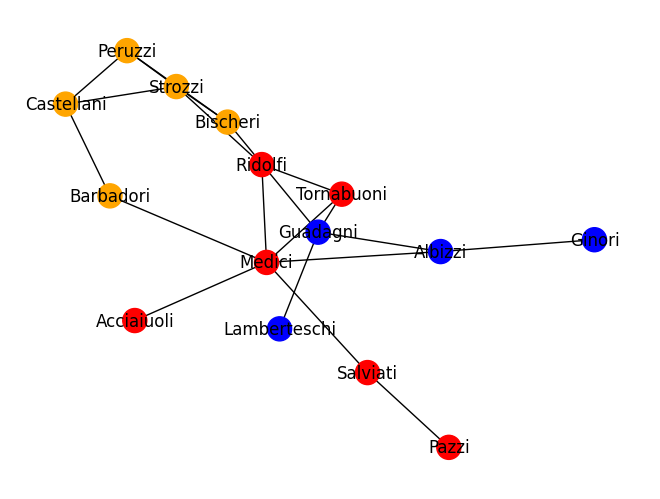

In [229]:
G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()

communities = naive_greedy_modularity_communities(G, resolution=1, weight=None)

print(communities)

colors = ["red", "orange", "blue", "black", "gold", "yellow", "green", "brown", "pink"]
color_map = []
for node in G:
    for j in range(len(list(communities))):
        if node in communities[j]:
            color_map.append(colors[j])
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

[{'MmeMagloire', 'OldMan', 'Geborand', 'Cravatte', 'Myriel', 'Champtercier', 'Count', 'CountessDeLo', 'Napoleon', 'MlleBaptistine'}, {'Woman1', 'Gillenormand', 'Scaufflaire', 'Toussaint', 'Javert', 'Valjean', 'MotherInnocent', 'Isabeau', 'MlleGillenormand', 'Simplice', 'Marius', 'Magnon', 'Cosette', 'Woman2', 'MmePontmercy', 'Fauchelevent', 'Labarre', 'MlleVaubois', 'Gervais', 'Pontmercy', 'MmeDeR', 'Gribier', 'BaronessT', 'LtGillenormand', 'Perpetue'}, {'Blacheville', 'Fantine', 'Zephine', 'Fameuil', 'Tholomyes', 'Listolier', 'Dahlia', 'Favourite', 'Marguerite'}, {'Eponine', 'MmeThenardier', 'Anzelma', 'Thenardier', 'Montparnasse', 'Babet', 'Gueulemer', 'Brujon', 'Claquesous', 'Boulatruelle'}, {'Champmathieu', 'Chenildieu', 'Bamatabois', 'Cochepaille', 'Judge', 'Brevet'}, {'Child2', 'MmeHucheloup', 'Joly', 'Combeferre', 'MotherPlutarch', 'Bossuet', 'Bahorel', 'Feuilly', 'Prouvaire', 'Jondrette', 'Grantaire', 'MmeBurgon', 'Courfeyrac', 'Enjolras', 'Mabeuf', 'Child1', 'Gavroche'}]


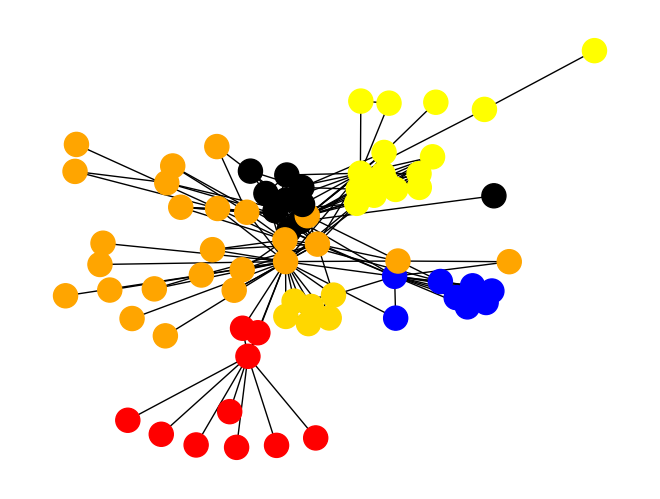

In [225]:
G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()
G = nx.les_miserables_graph()

communities = louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)

print(communities)

colors = ["red", "orange", "blue", "black", "gold", "yellow", "green", "brown", "pink"]
color_map = []
for node in G:
    for j in range(len(list(communities))):
        if node in communities[j]:
            color_map.append(colors[j])
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

# weakly connected components

[[0, 1, 2, 3], [10, 11, 12]]


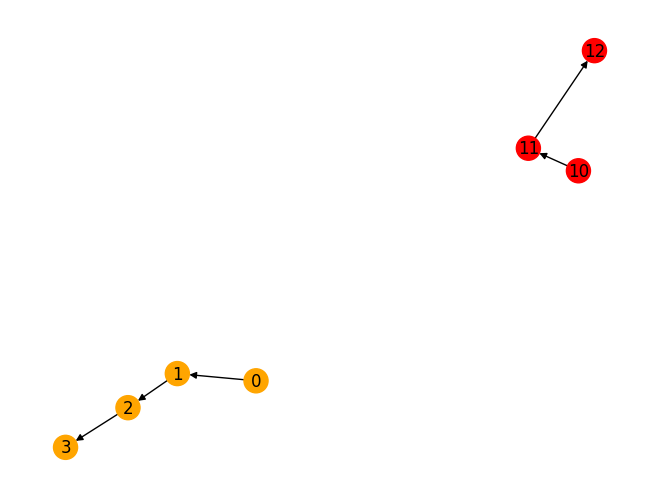

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.components import weakly_connected_components

G = nx.path_graph(4, create_using=nx.DiGraph())
nx.add_path(G, [10, 11, 12])

communities = weakly_connected_components(G)

node_groups = []
for com in communities:
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    else: 
        color_map.append('red')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# katz centrality

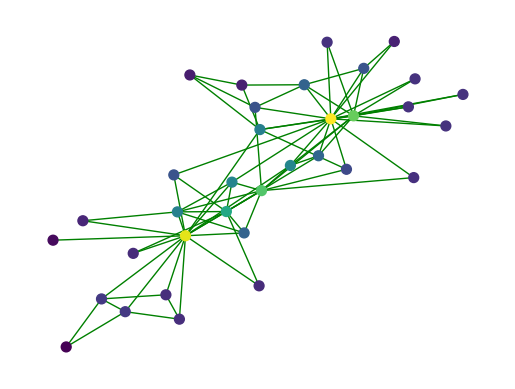

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()
G = nx.les_miserables_graph()
G = nx.karate_club_graph()

centrality = nx.katz_centrality(G)
colors = list(centrality.values())

nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=50,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)

plt.axis("off")
plt.show()


# closeness centrality

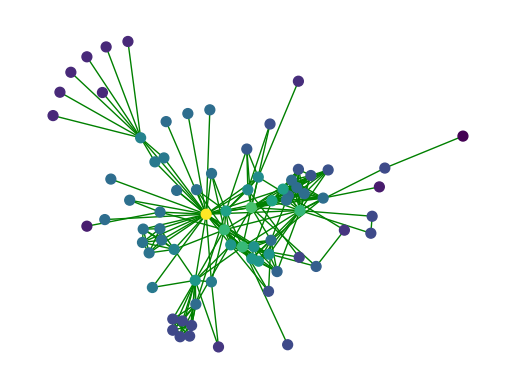

In [222]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()
G = nx.les_miserables_graph()

centrality = nx.closeness_centrality(G)
colors = list(centrality.values())

nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=50,
    node_color=colors,
    edge_color="g",
    with_labels=False,
)

plt.axis("off")
plt.show()

# degree centrality

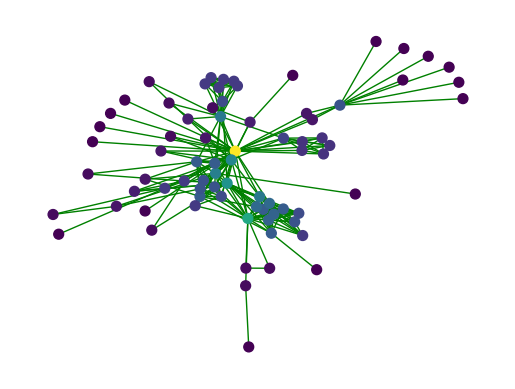

In [221]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()
G = nx.les_miserables_graph()
centrality = nx.degree_centrality(G)
colors = list(centrality.values())

nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=50,
    node_color=colors,
    edge_color="g",
    with_labels=False,
)

plt.axis("off")
plt.show()

# betweennes centrality

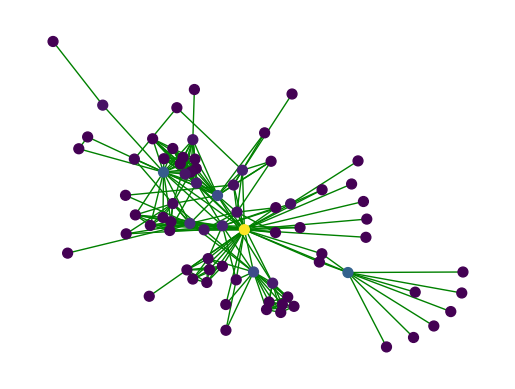

In [219]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
G = nx.davis_southern_women_graph()
G = nx.davis_southern_women_graph()
G = nx.florentine_families_graph()
G = nx.les_miserables_graph()

centrality = nx.betweenness_centrality(G)
colors = list(centrality.values())

nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=50,
    node_color=colors,
    edge_color="g",
    with_labels=False,
)

plt.axis("off")
plt.show()

# pagerank

Page rank value:  {'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


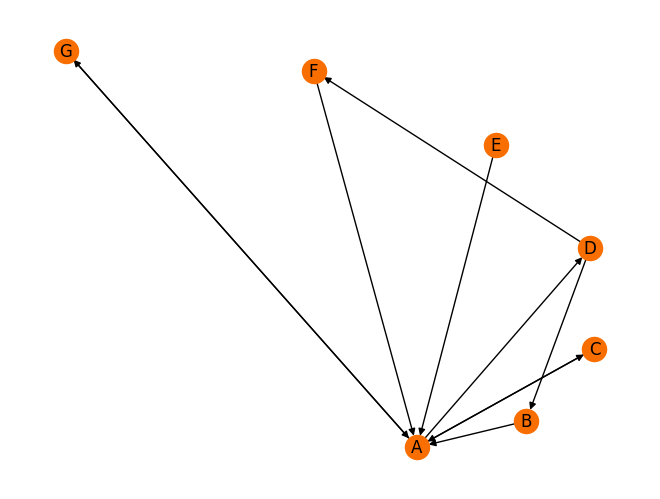

In [59]:
G = nx.DiGraph()

[G.add_node(k) for k in ["A", "B", "C", "D", "E", "F", "G"]]
G.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])


ppr1 = nx.pagerank(G)

print("Page rank value: ", ppr1)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

# pagerank - graph types

Page rank value:  {0: 0.08850807396280012, 1: 0.057414840497110056, 2: 0.06276686454603017, 3: 0.03721208153631377, 4: 0.020503977347501652, 5: 0.03381044255357727, 6: 0.03152901134345504, 7: 0.026464618678806107, 8: 0.03338155566846444, 9: 0.009463219565799959, 10: 0.020689016083505596, 11: 0.009785686547904305, 12: 0.011474872305945287, 13: 0.033474187085322404, 14: 0.012941600888556285, 15: 0.01637633262359366, 16: 0.016755401561857987, 17: 0.009677265915396801, 18: 0.009544864590131914, 19: 0.013077518431081969, 20: 0.011224235021037596, 21: 0.01136015256356328, 22: 0.01296059860686279, 23: 0.04114596964602211, 24: 0.01663437445025268, 25: 0.028672962013730707, 26: 0.015240392773380823, 27: 0.027235358397633882, 28: 0.01447852177427162, 29: 0.028271813832825125, 30: 0.02303184425091186, 31: 0.04198548926127872, 32: 0.07592643687005646, 33: 0.09698041880501741}


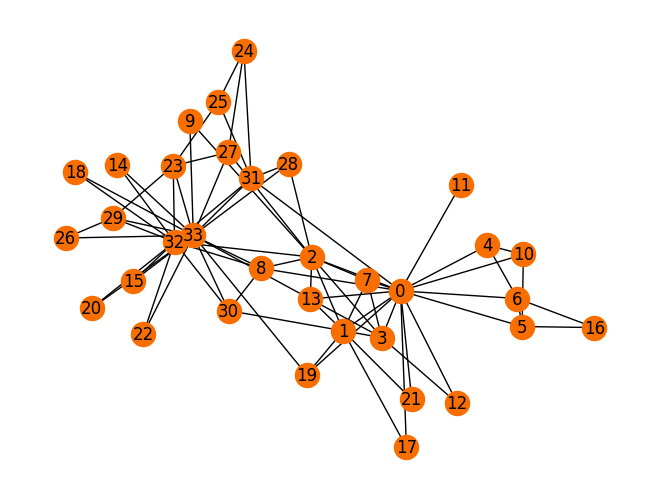

In [218]:
G = nx.karate_club_graph()

ppr1 = nx.pagerank(G)

print("Page rank value: ", ppr1)
pos = nx.spiral_layout(G)
pos = nx.shell_layout(G)
pos = nx.random_layout(G)
pos = nx.circular_layout(G)
pos = nx.spectral_layout(G)
pos = nx.spring_layout(G)


nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

# edge colors

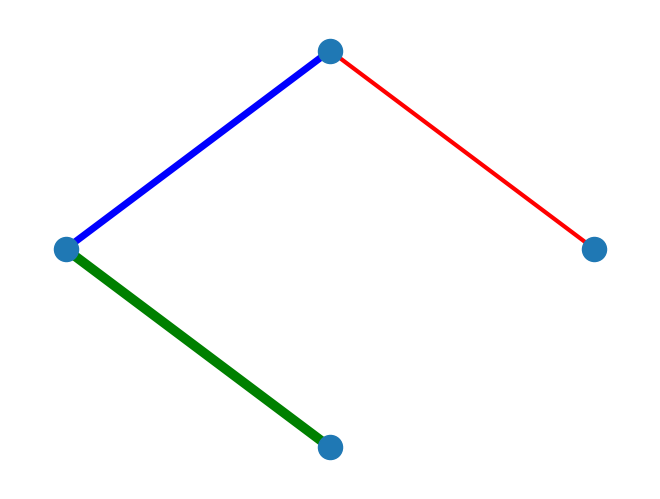

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2, color='r' ,weight=3)
G.add_edge(2, 3, color='b', weight=5)
G.add_edge(3, 4, color='g', weight=7)

pos = nx.circular_layout(G)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

nx.draw(G, pos, edge_color=colors, width=list(weights))

plt.show()

# node colors

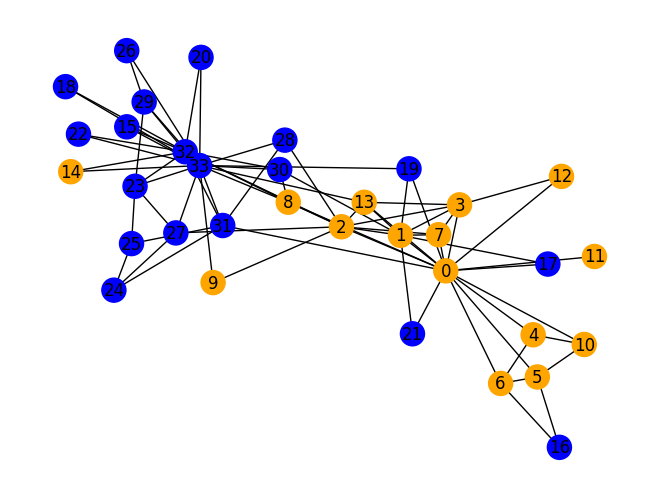

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
color_map = []
for node in G:
    if node < 15:
        color_map.append('orange')
    else: 
        color_map.append('blue')      

nx.draw(G, node_color=color_map, with_labels=True)

plt.show()

# node colors 2

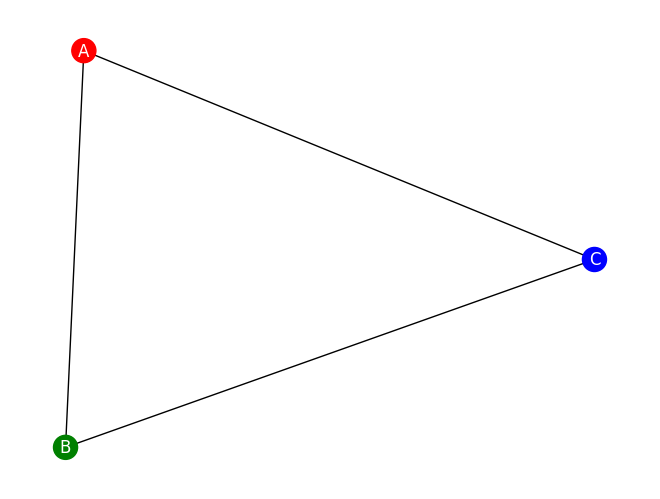

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node('A', color='red')
G.add_node('B', color='green')
G.add_node('C', color='blue')

G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'C')])

colors = [node[1]['color'] for node in G.nodes(data=True)]

nx.draw(G, node_color=colors, with_labels=True, font_color='white')

plt.show()

# Dijkstra shortest path

In [78]:
import networkx as nx

edges = [
    (1, 2, {"weight": 4}),
    (1, 3, {"weight": 2}),
    (2, 3, {"weight": 1}),
    (2, 4, {"weight": 5}),
    (3, 4, {"weight": 8}),
    (3, 5, {"weight": 10}),
    (4, 5, {"weight": 2}),
    (4, 6, {"weight": 8}),
    (5, 6, {"weight": 5}),
]
edge_labels = {
    (1, 2): 4,
    (1, 3): 2,
    (2, 3): 1,
    (2, 4): 5,
    (3, 4): 8,
    (3, 5): 10,
    (4, 5): 2,
    (4, 6): 8,
    (5, 6): 5,
}


G = nx.Graph()
for i in range(1, 7):
    G.add_node(i)
G.add_edges_from(edges)

pos = nx.planar_layout(G)

# This will give us all the shortest paths from node 1 using the weights from the edges.
p1 = nx.shortest_path(G, source=1, weight="weight")

# This will give us the shortest path from node 1 to node 6.
p1to6 = nx.shortest_path(G, source=1, target=6, weight="weight")

# This will give us the length of the shortest path from node 1 to node 6.
length = nx.shortest_path_length(G, source=1, target=6, weight="weight")

print("All shortest paths from 1: ", p1)
print("Shortest path from 1 to 6: ", p1to6)
print("Length of the shortest path: ", length)

All shortest paths from 1:  {1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 3, 2, 4], 5: [1, 3, 2, 4, 5], 6: [1, 3, 2, 4, 5, 6]}
Shortest path from 1 to 6:  [1, 3, 2, 4, 5, 6]
Length of the shortest path:  15


# A' shortest path

Path:  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
Path length:  6


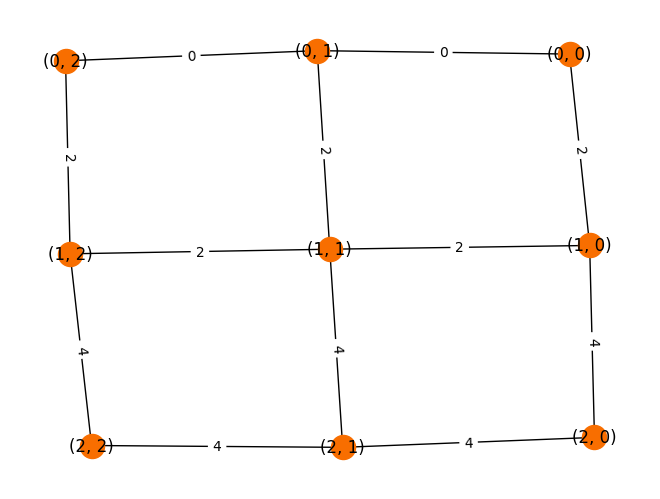

In [81]:
import networkx as nx
import matplotlib.pyplot as plt


def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


G = nx.grid_graph(dim=[3, 3])  # nodes are two-tuples (x,y)
nx.set_edge_attributes(G, {e: e[1][0] * 2 for e in G.edges()}, "cost")
path = nx.astar_path(G, (0, 0), (2, 2), heuristic=dist, weight="cost")
length = nx.astar_path_length(G, (0, 0), (2, 2), heuristic=dist, weight="cost")
print("Path: ", path)
print("Path length: ", length)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Floyd Warshall shortest path

{1: {1: 0, 2: 3, 3: 2, 4: 8, 5: 10, 6: 15},
 2: {1: 3, 2: 0, 3: 1, 4: 5, 5: 7, 6: 12},
 3: {1: 2, 2: 1, 3: 0, 4: 6, 5: 8, 6: 13},
 4: {1: 8, 2: 5, 3: 6, 4: 0, 5: 2, 6: 7},
 5: {1: 10, 2: 7, 3: 8, 4: 2, 5: 0, 6: 5},
 6: {1: 15, 2: 12, 3: 13, 4: 7, 5: 5, 6: 0}}


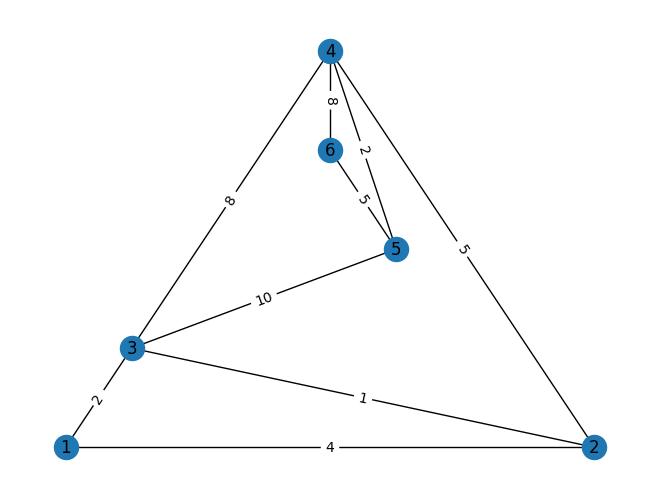

In [82]:
import networkx as nx
import pprint as pp

edges = [(1,2, {'weight':4}),
        (1,3,{'weight':2}),
        (2,3,{'weight':1}),
        (2,4, {'weight':5}),
        (3,4, {'weight':8}),
        (3,5, {'weight':10}),
        (4,5,{'weight':2}),
        (4,6,{'weight':8}),
        (5,6,{'weight':5})]
edge_labels = {(1,2):4, (1,3):2, (2,3):1, (2,4):5, (3,4):8, (3,5):10, (4,5):2, (4,6):8, (5,6):5}
   
        
G = nx.Graph()
for i in range(1,7):
    G.add_node(i)
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_labels)

fw = nx.floyd_warshall(G, weight='weight')

results = {a:dict(b) for a,b in fw.items()}  
pp.pprint(results)

# Nodes connected to the selected one

In [83]:
G = nx.Graph([(0, 1), (1, 2), (5, 6), (3, 4)])

nx.node_connected_component(G, 0)  # nodes of component that contains node 0

{0, 1, 2}

# Condensation

In [91]:
G = nx.barbell_graph(4, 0)

G.remove_edge(3, 4)

G = nx.DiGraph(G)

H = nx.condensation(G)

H.nodes.data()

NodeDataView({0: {'members': {0, 1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}})

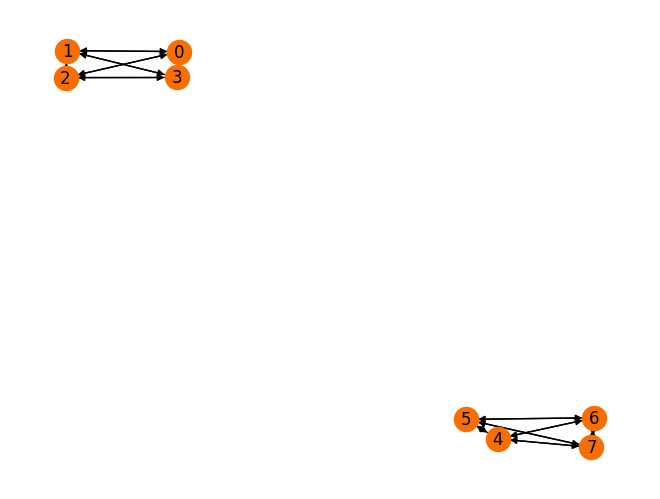

In [92]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")

In [93]:
H.graph['mapping']
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}

G = nx.complete_graph(7, create_using=nx.DiGraph)

H = nx.condensation(G)

H.nodes.data()

NodeDataView({0: {'members': {0, 1, 2, 3, 4, 5, 6}}})

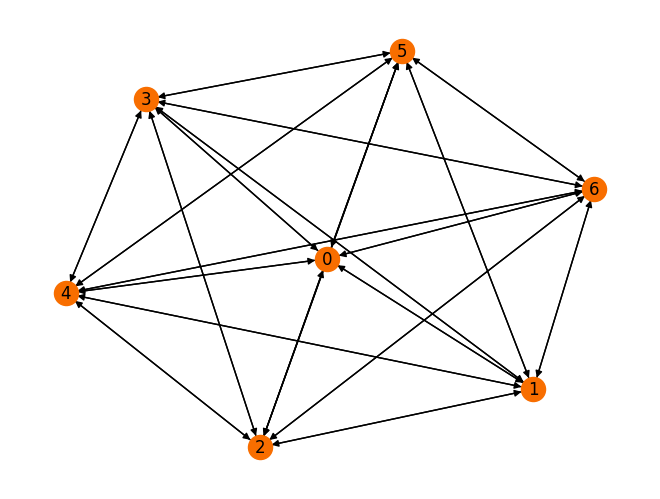

In [94]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")

# Minors

In [118]:
# contracted edge

G = nx.cycle_graph(4)

M = nx.contracted_edge(C5, (0, 1), self_loops=False)

N = nx.contracted_nodes(G, 1, 2, self_loops=False)

O = nx.identified_nodes(G, 1, 2, self_loops=True, copy=True)

# Small World

In [121]:
G = nx.karate_club_graph()

nx.sigma(G, niter=100, nrand=10, seed=None)

1.0561934072783732

In [122]:
nx.omega(G, niter=5, nrand=10, seed=None)

-0.059067357512953444

# Summarization

### dedensify
Compresses neighborhoods around high-degree nodes

Reduces the number of edges to high-degree nodes by adding compressor nodes that summarize multiple edges of the same type to high-degree nodes (nodes with a degree greater than a given threshold). Dedensification also has the added benefit of reducing the number of edges around high-degree nodes. The implementation currently supports graphs with a single edge type.

According to the algorithm in [1], removes edges in a graph by compressing/decompressing the neighborhoods around high degree nodes by adding compressor nodes that summarize multiple edges of the same type to high-degree nodes. Dedensification will only add a compressor node when doing so will reduce the total number of edges in the given graph. This implementation currently supports graphs with a single edge type.

In [127]:
original_graph = nx.DiGraph()
original_graph.add_nodes_from(
    ["1", "2", "3", "4", "5", "6", "A", "B", "C"]
)
original_graph.add_edges_from(
    [
        ("1", "C"), ("1", "B"),
        ("2", "C"), ("2", "B"), ("2", "A"),
        ("3", "B"), ("3", "A"), ("3", "6"),
        ("4", "C"), ("4", "B"), ("4", "A"),
        ("5", "B"), ("5", "A"),
        ("6", "5"),
        ("A", "6")
    ]
)
c_graph, c_nodes = nx.dedensify(original_graph, threshold=2)
print(original_graph.number_of_edges())
print(c_graph.number_of_edges())

15
14


In [128]:
original_graph = nx.DiGraph()
original_graph.add_nodes_from(
    ["1", "2", "3", "4", "5", "6", "A", "B", "C"]
)
original_graph.add_edges_from(
    [
        ("1", "C"), ("1", "B"),
        ("2", "C"), ("2", "B"), ("2", "A"),
        ("3", "B"), ("3", "A"), ("3", "6"),
        ("4", "C"), ("4", "B"), ("4", "A"),
        ("5", "B"), ("5", "A"),
        ("6", "5"),
        ("A", "6")
    ]
)

c_graph, c_nodes = nx.dedensify(original_graph, threshold=2)
print(original_graph.number_of_edges())
print(c_graph.number_of_edges())
# re-densifies the compressed graph into the original graph
for c_node in c_nodes:
    all_neighbors = set(nx.all_neighbors(c_graph, c_node))
    out_neighbors = set(c_graph.neighbors(c_node))
    for out_neighbor in out_neighbors:
        c_graph.remove_edge(c_node, out_neighbor)
    in_neighbors = all_neighbors - out_neighbors
    for in_neighbor in in_neighbors:
        c_graph.remove_edge(in_neighbor, c_node)
        for out_neighbor in out_neighbors:
            c_graph.add_edge(in_neighbor, out_neighbor)
    c_graph.remove_node(c_node)
nx.is_isomorphic(original_graph, c_graph)

15
14


True

In [129]:
original_graph = nx.karate_club_graph()
c_graph, c_nodes = nx.dedensify(original_graph, threshold=2)
print(original_graph.number_of_edges())
print(c_graph.number_of_edges())

78
77


### snap-aggregation

In [139]:
nodes = {
    "A": dict(color="Red"),
    "B": dict(color="Red"),
    "C": dict(color="Red"),
    "D": dict(color="Red"),
    "E": dict(color="Blue"),
    "F": dict(color="Blue"),
}
edges = [
    ("A", "E", "Strong"),
    ("B", "F", "Strong"),
    ("C", "E", "Weak"),
    ("D", "F", "Weak"),
]
original_graph = nx.Graph()
for node in nodes:
    attributes = nodes[node]
    original_graph.add_node(node, **attributes)
for source, target, type in edges:
    original_graph.add_edge(source, target, type=type)
node_attributes = ('color', )
edge_attributes = ('type', )
summary_graph = nx.snap_aggregation(original_graph, node_attributes=node_attributes, edge_attributes=edge_attributes)
print(original_graph.number_of_edges())
print(summary_graph.number_of_edges())

4
2


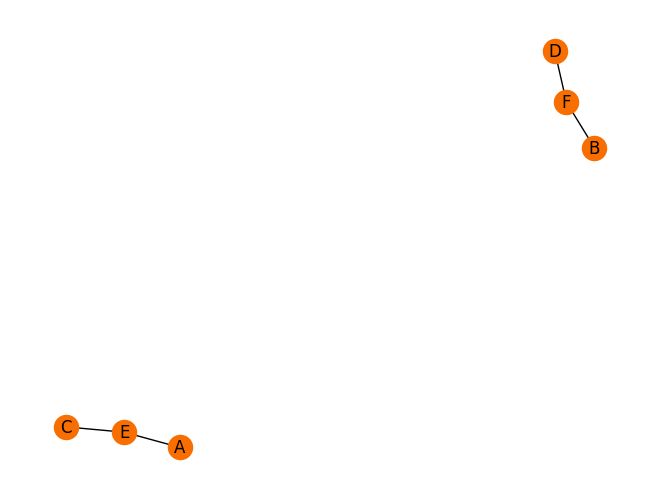

In [140]:
pos = nx.spring_layout(original_graph)
nx.draw(original_graph, pos, with_labels = True, node_color="#f86e00")

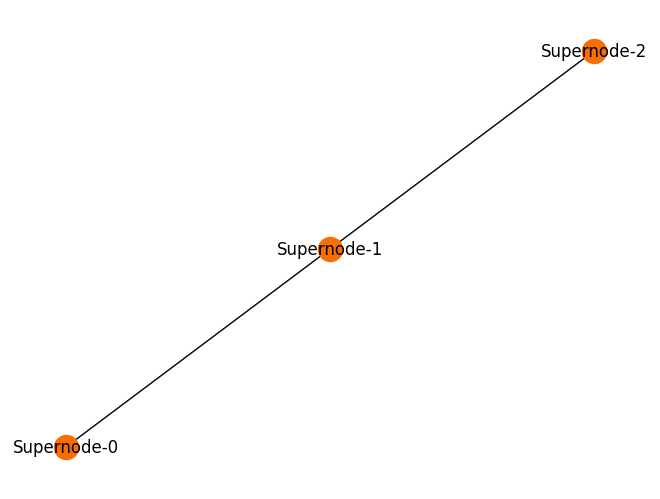

In [141]:
pos = nx.spring_layout(summary_graph)
nx.draw(summary_graph, pos, with_labels = True, node_color="#f86e00")

# matrices

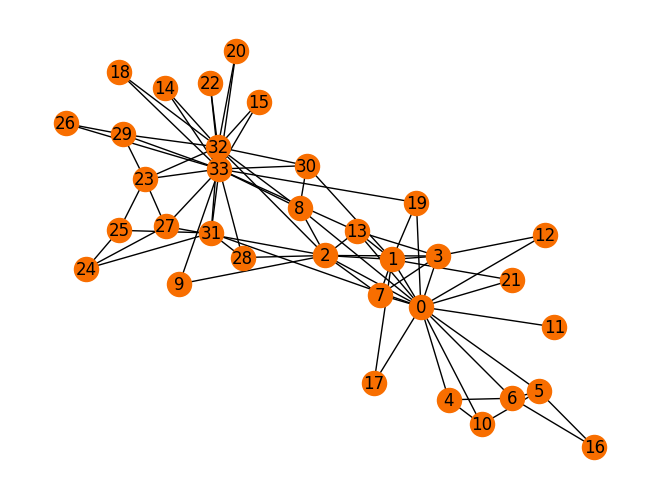

In [156]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")

Returns the Google matrix of the graph.

In [101]:
nx.google_matrix(G, alpha=0.85, personalization=None, nodelist=None, weight='weight', dangling=None) #Returns the Google matrix of the graph.

array([[0.00441176, 0.08536415, 0.10560224, ..., 0.04488796, 0.00441176,
        0.00441176],
       [0.12165314, 0.00441176, 0.18027383, ..., 0.00441176, 0.00441176,
        0.00441176],
       [0.13319964, 0.15895722, 0.00441176, ..., 0.00441176, 0.05592692,
        0.00441176],
       ...,
       [0.08536415, 0.00441176, 0.00441176, ..., 0.00441176, 0.16631653,
        0.16631653],
       [0.00441176, 0.00441176, 0.04914861, ..., 0.09388545, 0.00441176,
        0.11625387],
       [0.00441176, 0.00441176, 0.00441176, ..., 0.0752451 , 0.09295343,
        0.00441176]])

In [103]:
nx.hits(G, max_iter=100, tol=1e-08, nstart=None, normalized=True)
#Returns HITS hubs and authorities values for nodes.
#The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

({0: 0.0668777878017573,
  1: 0.0646082013987079,
  2: 0.07720593702807282,
  3: 0.04251538956587161,
  4: 0.011920567930085273,
  5: 0.014437084548291441,
  6: 0.01422728524063948,
  7: 0.038204301104034236,
  8: 0.05287480008426346,
  9: 0.010749022088966229,
  10: 0.009813389569912075,
  11: 0.009251077981447949,
  12: 0.008964766141133604,
  13: 0.05149077757366965,
  14: 0.017029873773128708,
  15: 0.02421897874783749,
  16: 0.003965088094607892,
  17: 0.009146428782312347,
  18: 0.010469361240848756,
  19: 0.01572002473101378,
  20: 0.013435321285774317,
  21: 0.012125472243659393,
  22: 0.01734416999434312,
  23: 0.04668552502066942,
  24: 0.010930126255860845,
  25: 0.026246198040701756,
  26: 0.01255315989536517,
  27: 0.031620548465526754,
  28: 0.01844466344409779,
  29: 0.02908332365104132,
  30: 0.033896584340598744,
  31: 0.044846896017269135,
  32: 0.07114077395376942,
  33: 0.07795709396472077},
 {0: 0.0668777878017573,
  1: 0.06460820139870788,
  2: 0.07720593702807284

Returns the attribute matrix using attributes from G as a numpy array.

If only G is passed in, then the adjacency matrix is constructed.

Let A be a discrete set of values for the node attribute node_attr. Then the elements of A represent the rows and columns of the constructed matrix. Now, iterate through every edge e=(u,v) in G and consider the value of the edge attribute edge_attr. If ua and va are the values of the node attribute node_attr for u and v, respectively, then the value of the edge attribute is added to the matrix element at (ua, va).

In [157]:
nx.attr_matrix(G, edge_attr=None, node_attr=None, normalized=False, rc_order=None, dtype=None, order=None)

(array([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]]),
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33])

Returns the modularity matrix of G.

The modularity matrix is the matrix B = A - <A>, where A is the adjacency matrix and <A> is the average adjacency matrix, assuming that the graph is described by the configuration model.

More specifically, the element B_ij of B is defined as

where k_i is the degree of node i, and where m is the number of edges in the graph. When weight is set to a name of an attribute edge, Aij, k_i, k_j and m are computed using its value.

In [158]:
nx.modularity_matrix(G, nodelist=None, weight=None)

array([[-1.64102564,  0.07692308, -0.02564103, ...,  0.38461538,
        -1.23076923, -1.74358974],
       [ 0.07692308, -0.51923077,  0.42307692, ..., -0.34615385,
        -0.69230769, -0.98076923],
       [-0.02564103,  0.42307692, -0.64102564, ..., -0.38461538,
         0.23076923, -1.08974359],
       ...,
       [ 0.38461538, -0.34615385, -0.38461538, ..., -0.23076923,
         0.53846154,  0.34615385],
       [-1.23076923, -0.69230769,  0.23076923, ...,  0.53846154,
        -0.92307692, -0.30769231],
       [-1.74358974, -0.98076923, -1.08974359, ...,  0.34615385,
        -0.30769231, -1.8525641 ]])

In [162]:
print(nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight'))

  (0, 1)	4
  (0, 2)	5
  (0, 3)	3
  (0, 4)	3
  (0, 5)	3
  (0, 6)	3
  (0, 7)	2
  (0, 8)	2
  (0, 10)	2
  (0, 11)	3
  (0, 12)	1
  (0, 13)	3
  (0, 17)	2
  (0, 19)	2
  (0, 21)	2
  (0, 31)	2
  (1, 0)	4
  (1, 2)	6
  (1, 3)	3
  (1, 7)	4
  (1, 13)	5
  (1, 17)	1
  (1, 19)	2
  (1, 21)	2
  (1, 30)	2
  :	:
  (32, 18)	1
  (32, 20)	3
  (32, 22)	2
  (32, 23)	5
  (32, 29)	4
  (32, 30)	3
  (32, 31)	4
  (32, 33)	5
  (33, 8)	4
  (33, 9)	2
  (33, 13)	3
  (33, 14)	2
  (33, 15)	4
  (33, 18)	2
  (33, 19)	1
  (33, 20)	1
  (33, 22)	3
  (33, 23)	4
  (33, 26)	2
  (33, 27)	4
  (33, 28)	2
  (33, 29)	2
  (33, 30)	3
  (33, 31)	4
  (33, 32)	5


In [161]:
print(nx.incidence_matrix(G, nodelist=None, edgelist=None, oriented=False, weight=None))

  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (0, 2)	1.0
  (3, 2)	1.0
  (0, 3)	1.0
  (4, 3)	1.0
  (0, 4)	1.0
  (5, 4)	1.0
  (0, 5)	1.0
  (6, 5)	1.0
  (0, 6)	1.0
  (7, 6)	1.0
  (0, 7)	1.0
  (8, 7)	1.0
  (0, 8)	1.0
  (10, 8)	1.0
  (0, 9)	1.0
  (11, 9)	1.0
  (0, 10)	1.0
  (12, 10)	1.0
  (0, 11)	1.0
  (13, 11)	1.0
  (0, 12)	1.0
  :	:
  (31, 65)	1.0
  (26, 66)	1.0
  (29, 66)	1.0
  (26, 67)	1.0
  (33, 67)	1.0
  (27, 68)	1.0
  (33, 68)	1.0
  (28, 69)	1.0
  (31, 69)	1.0
  (28, 70)	1.0
  (33, 70)	1.0
  (29, 71)	1.0
  (32, 71)	1.0
  (29, 72)	1.0
  (33, 72)	1.0
  (30, 73)	1.0
  (32, 73)	1.0
  (30, 74)	1.0
  (33, 74)	1.0
  (31, 75)	1.0
  (32, 75)	1.0
  (31, 76)	1.0
  (33, 76)	1.0
  (32, 77)	1.0
  (33, 77)	1.0


# matrix to graph

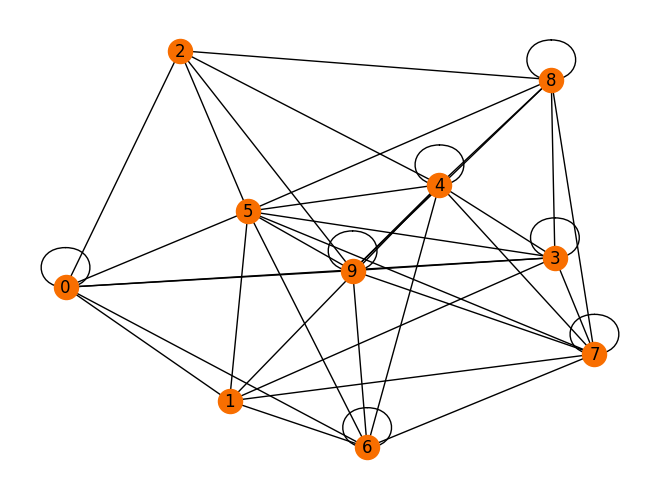

In [165]:
rng = np.random.default_rng()

a = rng.integers(low=0, high=2, size=(10, 10))

G = nx.from_numpy_array(a, create_using=nx.Graph)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")